In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop
# from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
# from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/upGrad_Darshan/main/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.v1.value_counts().sort_values(ascending=False)

,count
v1,
ham,4825
spam,747


Text(0.5, 0, 'Classes')

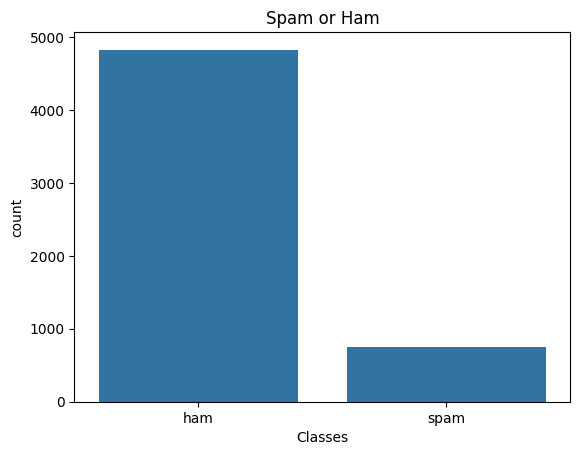

In [9]:
sns.countplot(x="v1",data=df)
plt.title("Spam or Ham")
plt.xlabel("Classes")

In [10]:
x=df.v2
x.head()

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
y=df.v1
y.head()

,v1
0,ham
1,ham
2,spam
3,ham
4,ham


In [19]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [22]:
y.shape

(5572,)

In [23]:
y = y.reshape(-1,1)
y.shape

(5572, 1)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4457,), (1115,), (4457, 1), (1115, 1))

In [25]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
x_test

,v2
4456,Aight should I just plan to come up later toni...
690,Was the farm open?
944,I sent my scores to sophas and i had to do sec...
3768,Was gr8 to see that message. So when r u leavi...
1189,In that case I guess I'll see you at campus lodge
...,...
2906,ALRITE
1270,"Sorry chikku, my cell got some problem thts y ..."
3944,I will be gentle princess! We will make sweet ...
2124,Beautiful Truth against Gravity.. Read careful...


In [27]:
# Top 1000 frequently occurring words
max_words = 1000

# https://keras.io/api/preprocessing/text/
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
tok

In [28]:
# Print the word
tok.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'be': 28,
 'at': 29,
 'do': 30,
 'if': 31,
 'ur': 32,
 'get': 33,
 'with': 34,
 "i'm": 35,
 'will': 36,
 'just': 37,
 'this': 38,
 'no': 39,
 'we': 40,
 '4': 41,
 'up': 42,
 'gt': 43,
 'lt': 44,
 'ok': 45,
 'when': 46,
 'out': 47,
 'all': 48,
 'go': 49,
 'free': 50,
 'what': 51,
 'from': 52,
 'how': 53,
 'know': 54,
 'then': 55,
 'like': 56,
 'good': 57,
 'its': 58,
 'got': 59,
 'come': 60,
 'time': 61,
 'am': 62,
 'day': 63,
 'only': 64,
 'was': 65,
 'love': 66,
 'send': 67,
 'there': 68,
 'want': 69,
 'text': 70,
 'he': 71,
 'txt': 72,
 'by': 73,
 'as': 74,
 'going': 75,
 'stop': 76,
 'about': 77,
 'need': 78,
 "i'll": 79,
 'one': 80,
 'lor': 81,
 'home': 82,
 'still': 83,
 'r': 84,
 'da

In [29]:
len(tok.word_index)

7824

In [30]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# Transforms each text in texts to a sequence of integers.
sequences = tok.texts_to_sequences(x_train)
sequences

[[39, 39, 38, 9, 82, 82, 383, 9],
 [1, 62, 8, 21, 75, 2, 356, 8, 4, 291, 368],
 [40, 52, 11, 157, 18, 806, 157, 18, 337, 18, 576, 9, 44, 43],
 [1, 369, 96, 577, 716, 25, 284, 262],
 [300, 164, 157, 73, 300, 150],
 [58, 32, 866, 2, 66, 214, 58, 32, 2, 66, 5, 80, 130, 6, 24],
 [71, 192, 77, 271, 64, 85, 1, 54],
 [123, 169, 7, 11, 37, 47, 5],
 [147, 31, 3, 27, 37, 457, 26, 26, 202, 263, 402, 4, 478, 132, 338, 165],
 [633,
  52,
  15,
  717,
  435,
  634,
  305,
  38,
  9,
  4,
  239,
  34,
  606,
  435,
  6,
  17,
  80,
  943,
  90,
  7,
  315],
 [34,
  5,
  357,
  9,
  384,
  6,
  500,
  171,
  26,
  524,
  418,
  34,
  130,
  9,
  577,
  2,
  6,
  9,
  31,
  6,
  524,
  6,
  524,
  31,
  6,
  171,
  6,
  83,
  524],
 [15,
  177,
  27,
  306,
  35,
  25,
  23,
  45,
  126,
  607,
  81,
  285,
  6,
  316,
  158,
  117,
  40,
  49,
  348,
  1,
  141,
  6,
  161,
  158,
  18,
  807,
  24,
  71,
  141,
  6,
  36,
  158,
  91],
 [119, 3, 196, 197, 59, 436, 12, 4, 339, 5, 754, 1, 3],
 [23, 1, 

In [32]:
x_train[100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [33]:
sequences[100]

[342, 175, 319, 42]

In [34]:
l = []
for i in range(len(sequences)):
  l.append(len(sequences[i]))
print(max(l), min(l))

171 0


In [38]:
max_len=180

from keras.utils import pad_sequences
sequence_matrix=pad_sequences(sequences,max_len)
sequence_matrix

array([[  0,   0,   0, ...,  82, 383,   9],
       [  0,   0,   0, ...,   4, 291, 368],
       [  0,   0,   0, ...,   9,  44,  43],
       ...,
       [  0,   0,   0, ...,  84, 112,  21],
       [  0,   0,   0, ...,   4,  56,   3],
       [  0,   0,   0, ..., 281,   2,   3]], dtype=int32)

In [39]:
sequence_matrix.shape

(4457, 180)

In [41]:
l = []
for i in range(len(sequence_matrix)):
  l.append(len(sequence_matrix[i]))
print(max(l), min(l))

180 180


In [42]:
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM,Embedding,Activation

In [46]:
def RNN():
  i=Input(name="input",shape=[max_len])
  x=Embedding(max_words,50,input_length=max_len)(i)
  x=LSTM(64)(x)
  x=Dense(256,activation="relu")(x)
  x=Dropout(0.25)(x)
  x=Dense(1,activation="sigmoid",name="output_layer")(x)

  model=Model(inputs=i,outputs=x)
  return model

In [47]:
from keras.src.losses import loss
model=RNN()
model.summary()
model.compile(loss="binary_crossentropy",optimizer=RMSprop(),metrics=["accuracy"])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 180, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
r=model.fit(sequence_matrix,y_train,epochs=10,callbacks=EarlyStopping(monitor="val_loss",patience=3),validation_split=0.2)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 197ms/step - accuracy: 0.8713 - loss: 0.3346 - val_accuracy: 0.9787 - val_loss: 0.0728
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.9800 - loss: 0.0790 - val_accuracy: 0.9865 - val_loss: 0.0533
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 16s 141ms/step - accuracy: 0.9879 - loss: 0.0410 - val_accuracy: 0.9843 - val_loss: 0.0670
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9900 - loss: 0.0289 - val_accuracy: 0.9765 - val_loss: 0.0782
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.9821 - val_loss: 0.0654


Text(0, 0.5, 'Accuracy')

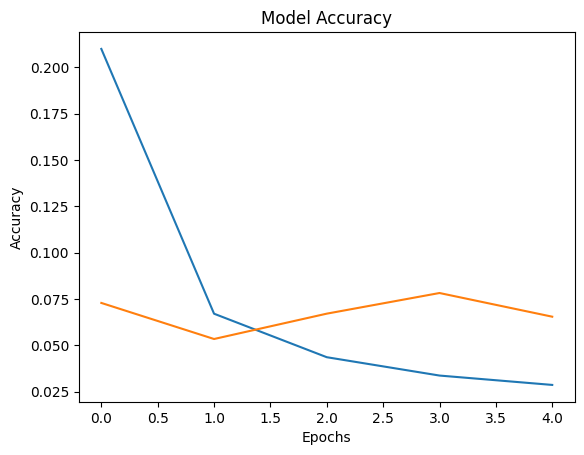

In [51]:
plt.plot(r.history["loss"])
plt.plot(r.history["val_loss"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [52]:
test_sequences=tok.texts_to_sequences(x_test)
test_sequences=pad_sequences(test_sequences,maxlen=max_len)

In [53]:
test_sequences

array([[  0,   0,   0, ...,  42,  97, 246],
       [  0,   0,   0, ...,  65,   5, 775],
       [  0,   0,   0, ...,  80,  10,   5],
       ...,
       [  0,   0,   0, ..., 131, 461,  66],
       [  0,   0,   0, ...,  14,  57, 133],
       [  0,   0,   0, ...,  33,  13, 308]], dtype=int32)

In [54]:
model.evaluate(test_sequences,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9791 - loss: 0.0695


[0.06521190702915192, 0.9829596281051636]

In [55]:
pred=model.predict(test_sequences).argmax(axis=1)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


array([0, 0, 0, ..., 0, 0, 0])

array([False, False, False, ..., False, False, False])

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

0.8511210762331839


array([[949,   0],
       [166,   0]])